<a href="https://colab.research.google.com/github/carnival77/Machine_Learning/blob/master/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Input points**



*  plot a set of points {(x(i),y(i))} that are loaded from 'data.csv' file (in black color)



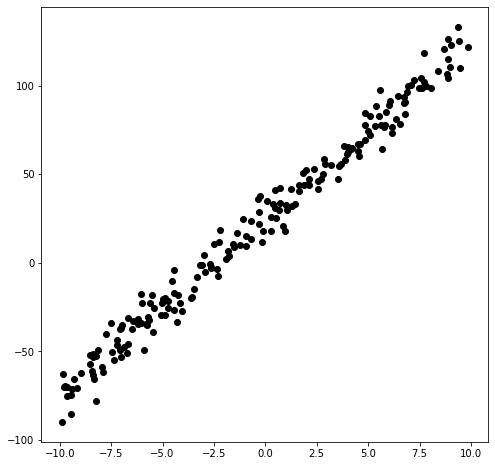

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import csv

path = "/content/drive/My Drive/Colab Notebooks/data.csv"
data = np.genfromtxt(path,delimiter=',')

xi_data = data[:,0]
yi_data = data[:,1]

plt.figure(figsize=(8,8))
plt.scatter(xi_data,yi_data,color="black")
plt.show()

#**2.Linear regression result**


*   plot a set of points {(x(i),y(i))} that are loaded from 'data.csv' file (in black color)



In [0]:
xi_data = data[:,0]
yi_data = data[:,1]

* plot a straight line obtained by the optimal linear regression based on the given set of points (in red color)


1. getting optimal solution by linear regression

(1) Linear Model

W (theta_1) = 1.0

b (theta_0) = 0.0

hypothesis = W*x + b = hθ​(x)=θ0​+θ1​x

In [0]:
W = 1.0
b = 0.0

n_data = number of data

steps = 1000 번의 학습 사이클. 

learning_rate = 0.03

In [0]:
n_data = len(xi_data)
steps = 5000
learning_rate = 0.01

(2) Objective Function

OF = objective function
 = J(θ)=2m1​∑i=1m​(hθ​(x(i))−y(i))2

(3) Gradient Descent

gradient_W : 

θ1(t+1)​:=θ1(t)​−αm1​∑i=1m​(hθ​(x(i))−y(i))x(i)

gradient_b :

θ0(t+1)​:=θ0(t)​−αm1​∑i=1m​(hθ​(x(i))−y(i))


In [0]:
for i in range(steps):
  hypothesis = W*xi_data + b
  OF = np.sum((hypothesis - yi_data)**2)/(2*n_data)
  gradient_W = np.sum((hypothesis - yi_data)*xi_data)/n_data
  gradient_b = np.sum((hypothesis - yi_data))/n_data
  
  W -= learning_rate*gradient_W
  b -= learning_rate*gradient_b

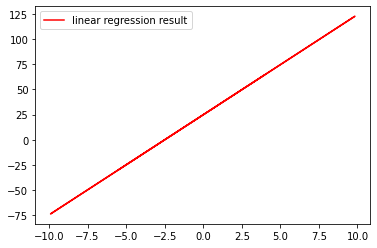

In [65]:
y = [W*x + b for x in xi_data]
plt.plot(xi_data,y,color="red",label="linear regression result")
plt.legend()
plt.show()



*   the estimated straight line (linear function) is superimposed on the set of points



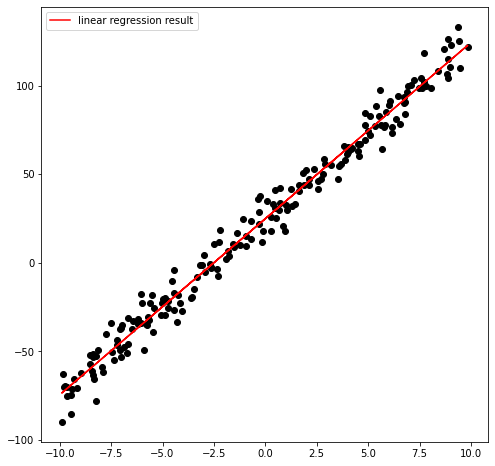

In [66]:
plt.figure(figsize=(8,8))
plt.scatter(xi_data,yi_data,color="black")

y = [W*x + b for x in xi_data]
plt.plot(xi_data,y,color="red",label="linear regression result")
plt.legend()
plt.show()